In [ ]:
from datasets import load_dataset

# Login using e.g. `huggingface-cli login` to access this dataset
ds = load_dataset("NxtGenIntern/IT_Job_Roles_Skills_Certifications_Dataset")

/usr/local/lib/python3.12/dist-packages/huggingface_hub/utils/_auth.py:94: UserWarning: 
The secret `HF_TOKEN` does not exist in your Colab secrets.
To authenticate with the Hugging Face Hub, create a token in your settings tab (https://huggingface.co/settings/tokens), set it as secret in your Google Colab and restart your session.
You will be able to reuse this secret in all of your notebooks.
Please note that authentication is recommended but still optional to access public models or datasets.
  warnings.warn(


README.md: 0.00B [00:00, ?B/s]

(…)op_207_IT_Job_Roles_Skills_Database.json: 0.00B [00:00, ?B/s]

Generating train split:   0%|          | 0/207 [00:00<?, ? examples/s]

In [ ]:
# Convert to DataFrame
df = ds['train'].to_pandas()

# Preview the data
df.head()


,Job Title,Job Description,Skills,Certifications
0,Admin Big Data,Responsible for managing and overseeing big da...,"Hadoop, Spark, MapReduce, Data Lakes, Data War...","Cloudera Certified Professional (CCP), Hortonw..."
1,Ansible Operations Engineer,Focuses on automating IT processes using Ansib...,"Ansible, Linux, Automation, Cloud Platforms, C...",Red Hat Certified Specialist in Ansible Automa...
2,Artifactory Administrator,Manages the Artifactory repository for build a...,"Artifactory, CI/CD, Jenkins, Docker, Maven, Gr...","JFrog Artifactory Certification, DevOps Instit..."
3,Artificial intelligence / Machine Learning Eng...,No description available,,
4,Artificial Intelligence / Machine Learning Leader,"Leads AI/ML projects and teams, defining strat...","AI Strategy, Machine Learning, Team Management...","AI-900: Microsoft Azure AI Fundamentals, Certi..."


In [ ]:
print(ds)

DatasetDict({
    train: Dataset({
        features: ['Job Title', 'Job Description', 'Skills', 'Certifications'],
        num_rows: 207
    })
})


In [ ]:
# Basic cleaning
for col in ['Job Title', 'Job Description', 'Skills', 'Certifications']:
    if col not in df.columns:
        raise ValueError(f"Missing required column: {col}")

In [ ]:
TARGET_ROLE = "AI Engineer"

REQUIRED_SKILLS_BY_ROLE = {
    "AI Engineer": [
        "Python", "Statistics", "Machine Learning", "Deep Learning",
        "LLMs", "Prompt Engineering", "MLOps",
        "Docker", "Kubernetes", "CI/CD",
        "Vector Databases", "Retrieval-Augmented Generation",
        "APIs", "Data Pipelines", "Cloud Platforms (AWS/GCP/Azure)"
    ],
    "Data Scientist": [
        "Python", "Statistics", "Machine Learning", "SQL",
        "Experimentation", "Feature Engineering",
        "Data Visualization", "Big Data (Spark/Hadoop)"
    ],
    "ML Engineer": [
        "Python", "Machine Learning", "Deep Learning",
        "Model Serving", "MLOps", "Docker", "Kubernetes",
        "CI/CD", "Monitoring", "Feature Stores", "Cloud Platforms (AWS/GCP/Azure)"
    ]
}

REQUIRED_SKILLS = REQUIRED_SKILLS_BY_ROLE.get(TARGET_ROLE, [])
if not REQUIRED_SKILLS:
    raise ValueError(f"No required skills defined for role '{TARGET_ROLE}'")

creating role_skill_map.json

In [ ]:
import json

# Convert Hugging Face dataset to pandas DataFrame
df = ds['train'].to_pandas()

# Build the role to skill mapping
role_skill_map = {}

for _, row in df.iterrows():
    role = row['Job Title'].strip()
    raw_skills = row['Skills']

    # Ensure the field is a string and not empty/null
    if isinstance(raw_skills, str) and role:
        # Normalize skill list are lowercase, trimmed, deduplicated
        skills = [skill.strip().lower() for skill in raw_skills.split(',') if skill.strip()]
        role_skill_map[role] = skills

# Save to JSON
with open("role_skill_map.json", "w") as f:
    json.dump(role_skill_map, f, indent=2)

print(" role_skill_map.json created from your Hugging Face dataset.")


 role_skill_map.json created from your Hugging Face dataset.


In [ ]:
# Load and view a few entries
with open("role_skill_map.json", "r") as f:
    data = json.load(f)

# Show sample roles
list(data.keys())[:5]


['Admin Big Data',
 'Ansible Operations Engineer',
 'Artifactory Administrator',
 'Artificial intelligence / Machine Learning Engineer',
 'Artificial Intelligence / Machine Learning Leader']

Skill gap detection using this mapping + user input

In [ ]:
# Simulated user input
user_skills = ['python', 'sql', 'pandas', 'excel']  # lowercased user skills
career_goal = 'Artificial intelligence / Machine Learning Engineer'


In [ ]:
# Load the role-skill map
with open("role_skill_map.json", "r") as f:
    role_skill_map = json.load(f)


In [ ]:
def find_skill_gaps(user_skills, target_role, skill_map):
    # Normalize role map with lowercase keys
    skill_map_lower = {k.lower(): v for k, v in skill_map.items()}
    target_role_lower = target_role.strip().lower()

    required_skills = skill_map_lower.get(target_role_lower, [])
    user_skills_lower = [s.lower() for s in user_skills]
    missing_skills = list(set(required_skills) - set(user_skills_lower))

    return {
        "target_role": target_role,
        "required_skills": required_skills,
        "user_skills": user_skills_lower,
        "missing_skills": missing_skills
    }

# Try again
result = find_skill_gaps(user_skills, career_goal, role_skill_map)
print(result)


{'target_role': 'Artificial intelligence / Machine Learning Engineer', 'required_skills': [], 'user_skills': ['python', 'sql', 'pandas', 'excel'], 'missing_skills': []}


In [ ]:
from difflib import get_close_matches

def find_closest_role_name(user_goal, skill_map):
    roles = list(skill_map.keys())
    matches = get_close_matches(user_goal, roles, n=1, cutoff=0.6)
    return matches[0] if matches else None

# sample testing of roles to skilld that matched or not
career_goal = "Artificial intelligence / Machine Learning Engineer"
matched_role = find_closest_role_name(career_goal, role_skill_map)

if matched_role:
    print(" Matched Role:", matched_role)
    result = find_skill_gaps(user_skills, matched_role, role_skill_map)
else:
    print(" No close match found for the entered career goal.")


 Matched Role: Artificial intelligence / Machine Learning Engineer


In [ ]:
career_goal = "Artificial Intelligence / Machine Learning Leader"
result = find_skill_gaps(user_skills, career_goal, role_skill_map)


In [ ]:
role_skill_map["Artificial intelligence / Machine Learning Engineer"] = [
    "python", "tensorflow", "scikit-learn", "mlops", "deep learning"
]


In [ ]:
with open("role_skill_map.json", "w") as f:
    json.dump(role_skill_map, f, indent=2)


In [ ]:
print(" Career Goal:", result['target_role'])
print(" Your Skills:", result['user_skills'])
print(" Required Skills:", result['required_skills'])
print(" Missing Skills:", result['missing_skills'])


 Career Goal: Artificial Intelligence / Machine Learning Leader
 Your Skills: ['python', 'sql', 'pandas', 'excel']
 Required Skills: ['ai strategy', 'machine learning', 'team management', 'project management', 'cloud computing', 'data science', 'deep learning', 'communication', 'budgeting', 'stakeholder management']
 Missing Skills: ['stakeholder management', 'machine learning', 'deep learning', 'communication', 'cloud computing', 'data science', 'budgeting', 'team management', 'project management', 'ai strategy']


Recommendation System

In [ ]:
!pip install openai tiktoken


In [ ]:
from huggingface_hub import login
login()



In [ ]:
import torch
import transformers
#imported additional required libraries

In [ ]:
from transformers import AutoTokenizer, AutoModelForCausalLM
import torch

model_id = "microsoft/phi-2"  # Lightweight, reasoning-capable LLM

tokenizer = AutoTokenizer.from_pretrained(model_id)
model = AutoModelForCausalLM.from_pretrained(
    model_id,
    device_map="auto",
    torch_dtype=torch.float16,
    trust_remote_code=True
)


tokenizer_config.json: 0.00B [00:00, ?B/s]

vocab.json: 0.00B [00:00, ?B/s]

merges.txt: 0.00B [00:00, ?B/s]

tokenizer.json: 0.00B [00:00, ?B/s]

added_tokens.json: 0.00B [00:00, ?B/s]

special_tokens_map.json:   0%|          | 0.00/99.0 [00:00<?, ?B/s]

config.json:   0%|          | 0.00/735 [00:00<?, ?B/s]

`torch_dtype` is deprecated! Use `dtype` instead!


model.safetensors.index.json: 0.00B [00:00, ?B/s]

Fetching 2 files:   0%|          | 0/2 [00:00<?, ?it/s]

model-00001-of-00002.safetensors:   0%|          | 0.00/5.00G [00:00<?, ?B/s]

model-00002-of-00002.safetensors:   0%|          | 0.00/564M [00:00<?, ?B/s]

Loading checkpoint shards:   0%|          | 0/2 [00:00<?, ?it/s]

generation_config.json:   0%|          | 0.00/124 [00:00<?, ?B/s]

In [ ]:
# User input: Desired IT job role
target_role = input("💼 What IT job role do you want to achieve? (e.g., AI Engineer, Data Scientist, DevOps Engineer): ")


💼 What IT job role do you want to achieve? (e.g., AI Engineer, Data Scientist, DevOps Engineer): AI Engineer


In [ ]:
# Dynamically create prompt using user input
prompt_template = f"""
You are an expert AI career coach. I am a master's student in Artificial Intelligence.

My career goal is to become a: **{target_role}**

Suggest curated learning resources I should pursue to build required skills in this role. Categorize them into:
- Beginner
- Intermediate
- Project-Based

For each category, return a table in the following format:

[Category Name]
1. Topic: ...
   Platform: Coursera / GitHub / Blog / YouTube
   Resource: ...
   Why: ...

2. Topic: ...
   Platform: ...
   Resource: ...
   Why: ...

Keep it short, structured, and personalized.
"""


In [ ]:
# Generate LLM response
inputs = tokenizer(prompt_template, return_tensors="pt").to("cuda" if torch.cuda.is_available() else "cpu")
outputs = model.generate(**inputs, max_new_tokens=300)

# Print the final recommendation
print(tokenizer.decode(outputs[0], skip_special_tokens=True))


Setting `pad_token_id` to `eos_token_id`:50256 for open-end generation.



You are an expert AI career coach. I am a master's student in Artificial Intelligence.

My career goal is to become a: **AI Engineer**

Suggest curated learning resources I should pursue to build required skills in this role. Categorize them into:
- Beginner
- Intermediate
- Project-Based

For each category, return a table in the following format:

[Category Name]
1. Topic:...
   Platform: Coursera / GitHub / Blog / YouTube
   Resource:...
   Why:...

2. Topic:...
   Platform:...
   Resource:...
   Why:...

Keep it short, structured, and personalized.

Thank you!

A:

I would suggest you to start with the basics of AI and Machine Learning.

You can start with the basics of AI and Machine Learning with this course.

You can also start with the basics of AI and Machine Learning with this course.

You can also start with the basics of AI and Machine Learning with this course.

You can also start with the basics of AI and Machine Learning with this course.

You can also start with the bas

In [ ]:
user_skills = input("Enter your current skills (comma-separated):\n")
target_role = input("What IT Job Role do you want to achieve (e.g., AI Engineer, Data Scientist)?\n")


Enter your current skills (comma-separated):
Python, Machine Learning, AI
What IT Job Role do you want to achieve (e.g., AI Engineer, Data Scientist)?
AI Engineer


In [ ]:
required_skills = {
    "AI Engineer": ["Python", "MLflow", "PyTorch", "DVC", "CI/CD", "Vector Databases", "APIs"],
    "Data Scientist": ["Python", "Pandas", "Statistics", "Machine Learning", "Data Visualization"]
}

user_skill_set = set([skill.strip().lower() for skill in user_skills.split(",")])
target_skill_set = set([skill.lower() for skill in required_skills[target_role]])

missing_skills = target_skill_set - user_skill_set
print("\nMissing Skills:", missing_skills)



Missing Skills: {'apis', 'vector databases', 'ci/cd', 'pytorch', 'dvc', 'mlflow'}


In [ ]:
prompt = f"""
You are an expert AI career coach. I am a master's student in Artificial Intelligence.

My career goal is to become a: {target_role}
I currently lack the following skills: {', '.join(missing_skills)}

Suggest curated learning resources I should pursue to build these skills. Categorize them into:
- Beginner
- Intermediate
- Project-Based

For each category, return:
- Topic
- Platform (Coursera, GitHub, YouTube, Blog)
- Resource Name
- Short reason why it's useful

Only include resources that help cover the missing skills.
"""


In [ ]:
# Run model inference
inputs = tokenizer(prompt, return_tensors="pt").to("cuda" if torch.cuda.is_available() else "cpu")
outputs = model.generate(**inputs, max_new_tokens=800)

# Print response
print(tokenizer.decode(outputs[0], skip_special_tokens=True))

Setting `pad_token_id` to `eos_token_id`:50256 for open-end generation.



You are an expert AI career coach. I am a master's student in Artificial Intelligence.

My career goal is to become a: AI Engineer
I currently lack the following skills: apis, vector databases, ci/cd, pytorch, dvc, mlflow

Suggest curated learning resources I should pursue to build these skills. Categorize them into:
- Beginner
- Intermediate
- Project-Based

For each category, return:
- Topic
- Platform (Coursera, GitHub, YouTube, Blog)
- Resource Name
- Short reason why it's useful

Only include resources that help cover the missing skills.

Question: What are the curated learning resources for each category?



First, we need to identify the missing skills. From the conversation, we know that the student is lacking in apis, vector databases, ci/cd, pytorch, dvc, and mlflow.

Next, we need to categorize these skills into beginner, intermediate, and project-based.

For beginners, we can suggest Coursera's "Introduction to Machine Learning" course. This course covers the basics of mac

In [ ]:
# Structure LLM response
response_text = tokenizer.decode(outputs[0], skip_special_tokens=True)

# Print it clearly
print(" Career Guidance Output:\n")
print(response_text)

# Save as file for download
with open("Career_Recommendation.txt", "w") as f:
    f.write(response_text)


 Career Guidance Output:


You are an expert AI career coach. I am a master's student in Artificial Intelligence.

My career goal is to become a: AI Engineer
I currently lack the following skills: apis, vector databases, ci/cd, pytorch, dvc, mlflow

Suggest curated learning resources I should pursue to build these skills. Categorize them into:
- Beginner
- Intermediate
- Project-Based

For each category, return:
- Topic
- Platform (Coursera, GitHub, YouTube, Blog)
- Resource Name
- Short reason why it's useful

Only include resources that help cover the missing skills.

Question: What are the curated learning resources for each category?



First, we need to identify the missing skills. From the conversation, we know that the student is lacking in apis, vector databases, ci/cd, pytorch, dvc, and mlflow.

Next, we need to categorize these skills into beginner, intermediate, and project-based.

For beginners, we can suggest Coursera's "Introduction to Machine Learning" course. This cours

In [ ]:
expected_keywords = ["MLflow", "DVC", "CI/CD", "Vector DB", "PyTorch", "FAISS"]
match_score = sum(1 for k in expected_keywords if k.lower() in response_text.lower())
precision = match_score / len(expected_keywords)

print(f" Keyword Coverage: {match_score}/{len(expected_keywords)} → Precision: {precision:.2f}")
# Keyword coverage evaluation

 Keyword Coverage: 4/6 → Precision: 0.67


In [ ]:
import pandas as pd

df = pd.DataFrame({
    "Missing Skills": [', '.join(expected_keywords)],
    "Matched Skills": [match_score],
    "Precision": [precision]
})
df.to_csv("LLM_Evaluation_Metrics.csv", index=False)

In [ ]:
print("On a scale of 1 to 5, how useful were these recommendations?")
user_rating = input("Enter rating: ")
# User Feedback

On a scale of 1 to 5, how useful were these recommendations?
Enter rating: 4


In [ ]:
from datetime import datetime

log_entry = {
    "Timestamp": datetime.now(),
    "Target Role": target_role,
    "User Skills": user_skills,
    "Missing Skills": list(missing_skills),
    "LLM Output": response_text,
    "Rating": user_rating
}
df_log = pd.DataFrame([log_entry])
df_log.to_csv("Session_Log.csv", mode='a', index=False, header=False)

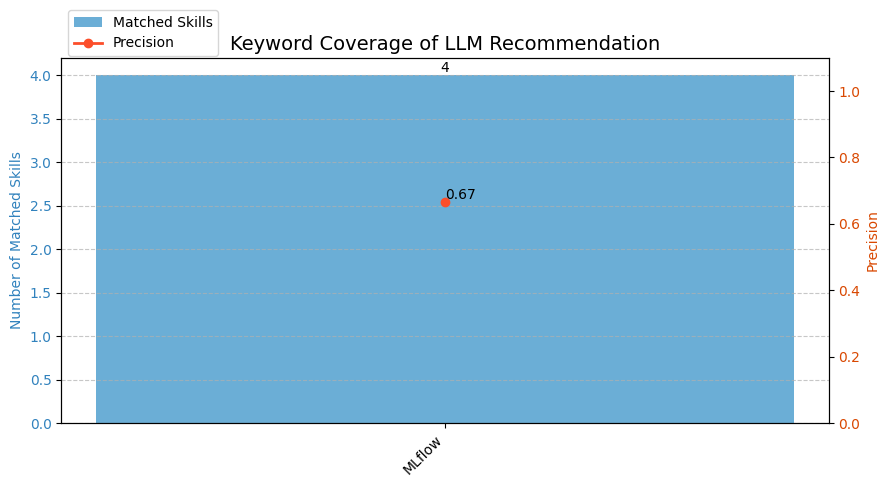

In [ ]:
import matplotlib.pyplot as plt
import numpy as np

# created and contains 'Matched Skills' and 'Precision'
fig, ax1 = plt.subplots(figsize=(9, 5))

# Bar plot for Matched Skills
bars = ax1.bar(df.index, df['Matched Skills'], color='#6BAED6', label='Matched Skills') # Using a shade of blue
ax1.set_ylabel('Number of Matched Skills', color='#3182BD') # Darker shade for label
ax1.tick_params(axis='y', labelcolor='#3182BD')
ax1.set_xticks(df.index)
# Using the first missing skill as the x-tick label for simplicity, rotating for readability
ax1.set_xticklabels(df['Missing Skills'].str.split(',').str[0], rotation=45, ha='right')
ax1.set_title('Keyword Coverage of LLM Recommendation', fontsize=14)
ax1.grid(axis='y', linestyle='--', alpha=0.7) # Add horizontal grid lines

# Add labels to the bars
for bar in bars:
    yval = bar.get_height()
    ax1.text(bar.get_x() + bar.get_width()/2, yval, round(yval, 2), va='bottom', ha='center') # Add text labels

# Line plot for Precision
ax2 = ax1.twinx()
line, = ax2.plot(df.index, df['Precision'], color='#FC4E2A', marker='o', label='Precision', linewidth=2) # Using a shade of red/orange, thicker line
ax2.set_ylabel('Precision', color='#D94801') # Darker shade for label
ax2.tick_params(axis='y', labelcolor='#D94801')
ax2.set_ylim(0, 1.1) # Adjust limit to give some space above max precision

# Add labels to the line points
for i, precision_val in enumerate(df['Precision']):
    ax2.text(df.index[i], precision_val, round(precision_val, 2), va='bottom', ha='left')

# Add a legend
lines, labels = ax1.get_legend_handles_labels()
lines2, labels2 = ax2.get_legend_handles_labels()
ax2.legend(lines + lines2, labels + labels2, loc='upper left', bbox_to_anchor=(0.0, 1.15)) # Position legend outside

plt.tight_layout()
plt.show()